In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import random
import matplotlib.pyplot as plt
import numpy as np

#Path to dataset
dataset_dir = "D:/RUTA/SEM7/archive/ALL"

#Parameters
img_size = (128,128)
batch_size = 32
num_classes = 4
epochs = 7

#Data generators - load and prepare images, feed batches of images to the model efficiently and automatically
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True)

val_gen = datagen.flow_from_directory(
    dataset_dir, target_size=img_size, batch_size=batch_size,class_mode='categorical', subset='validation', shuffle=False)

Found 16000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [ ]:
#Building the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Training the model
history = model.fit(
    train_gen,
    steps_per_epoch=500, #Reducing the steps speeds up training
    validation_data=val_gen,
    validation_steps=20,
    epochs=epochs,
)

Epoch 1/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 199ms/step - accuracy: 0.5774 - loss: 0.9912 - val_accuracy: 0.7641 - val_loss: 0.7431
Epoch 2/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.7799 - loss: 0.5362 - val_accuracy: 0.9266 - val_loss: 0.4687
Epoch 3/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.8409 - loss: 0.3828 - val_accuracy: 0.8109 - val_loss: 0.5336
Epoch 4/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 106s 213ms/step - accuracy: 0.8696 - loss: 0.2940 - val_accuracy: 0.7547 - val_loss: 0.5656
Epoch 5/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 222ms/step - accuracy: 0.8884 - loss: 0.2817 - val_accuracy: 0.9609 - val_loss: 0.1829
Epoch 6/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 205ms/step - accuracy: 0.9086 - loss: 0.2372 - val_accuracy: 0.9609 - val_loss: 0.1909
Epoch 7/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 112s 223ms/step - accuracy: 0.9116 - loss: 0.2215 - val_accuracy: 0.9281 - val_loss: 0.2500


In [ ]:
#Evaluating the model
val_gen.reset()
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=list(train_gen.class_indices.keys())))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

#Accuracy - how accurate the model is in its predictions
acc_score = accuracy_score(y_true, y_pred_classes)
print(f"\nAccuracy Score: {acc_score:.4f}")

#ROC-AUC Score
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
roc_auc = roc_auc_score(y_true_bin, y_pred, multi_class='ovr')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step
Classification Report:
               precision    recall  f1-score   support

  all_benign       0.92      0.92      0.92      1000
   all_early       0.94      0.92      0.93      1000
     all_pre       0.97      0.97      0.97      1000
     all_pro       0.99      1.00      0.99      1000

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000

Confusion Matrix:
 [[924  57  13   6]
 [ 55 924  19   2]
 [ 22   1 975   2]
 [  0   0   1 999]]

Accuracy Score: 0.9555
ROC AUC Score (OvR): 0.9966


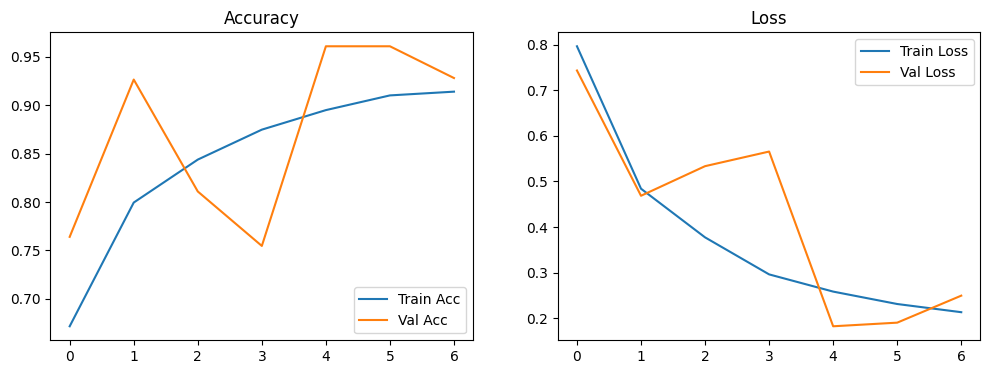

In [37]:
#Plotting the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

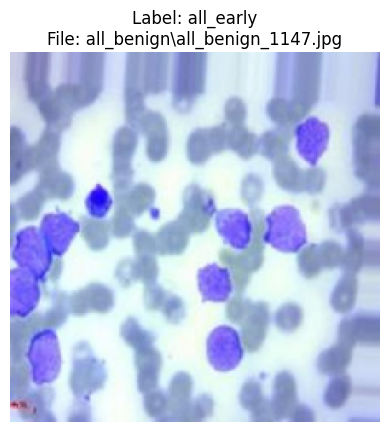

In [48]:
#Displaying a random image if required

images, labels = next(train_gen) #Getting one batch
i = random.randint(0, len(images) - 1) #Picking a random image from the batch
image = images[i]
label_index = np.argmax(labels[i])
class_names = list(train_gen.class_indices.keys())
label_name = class_names[label_index]

# Calculating the corresponding index in train_gen.filenames 
batch_index = train_gen.batch_index - 1  #previous batch (it already moved to next internally)
image_index_in_dataset = (batch_index * train_gen.batch_size) + i
if image_index_in_dataset >= len(train_gen.filenames):
    image_index_in_dataset = len(train_gen.filenames) - 1  #in case of overflow

filename = train_gen.filenames[image_index_in_dataset]

plt.imshow(image)
plt.title(f"Label: {label_name}\nFile: {filename}")
plt.axis('off')
plt.show()

In [ ]:
#Saving the model if required
model.save('final_model.h5')